# Question 1.  Unsupervised data analysis using clustering

In this assignment, you will be working with a mystery dataset.  Your task will be to load and explore the data, and identify how many clusters there are in the dataset.

You should submit your assignment as a fully commented code with all plots included. It should be clear where any plots produced originate. Your should provide an interpretation of your results throughout. The ideal format is .ipynb and the accompanying .html file including plots and comments. Other formats are acceptable as long as code can be copied and tested for accuracy, but the presentation of the results is important.



In [2]:
# load libraries

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import metrics
import seaborn as sns

#clustering libraries
sns.set()
sns.set_style('white')
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances


## 1.	Load and explore the data [3 marks]

1.1. Print / plot the data matrix.

1.2. How many features does the data contain?

1.3. How many samples does the data contain?


1000


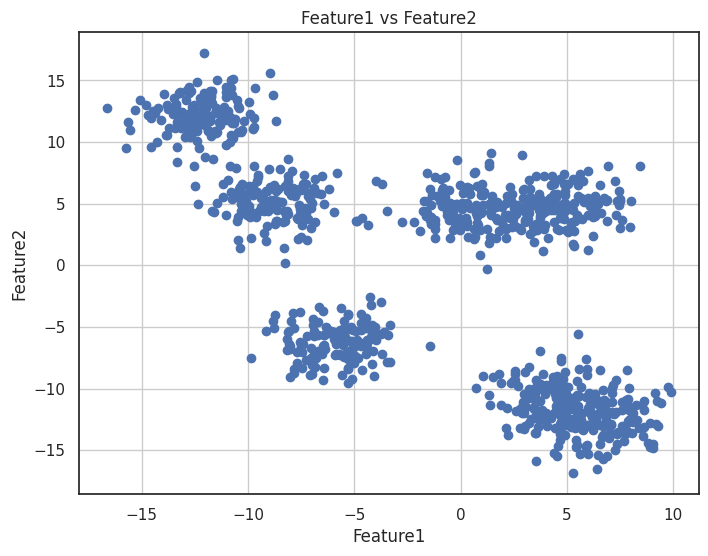

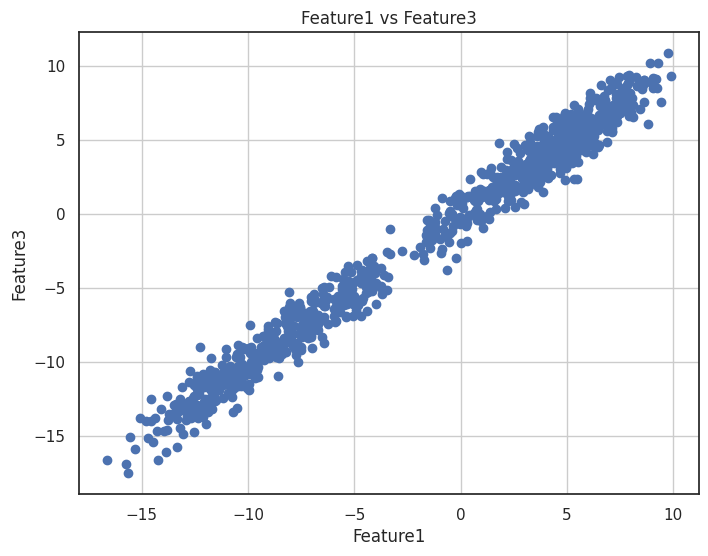

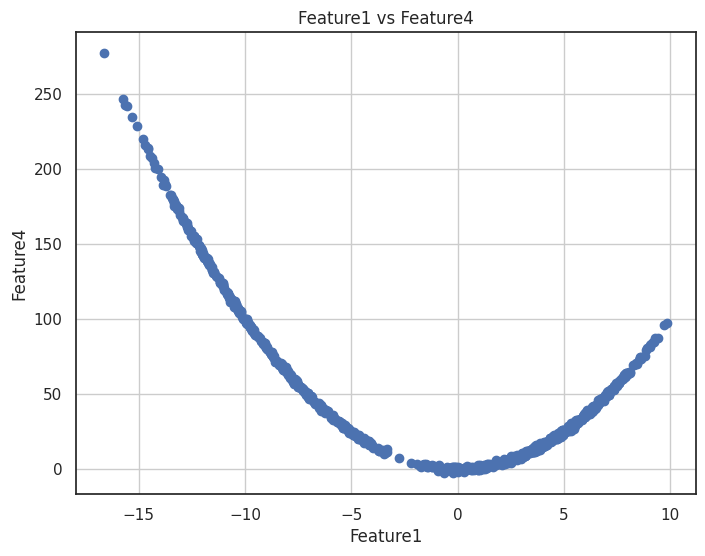

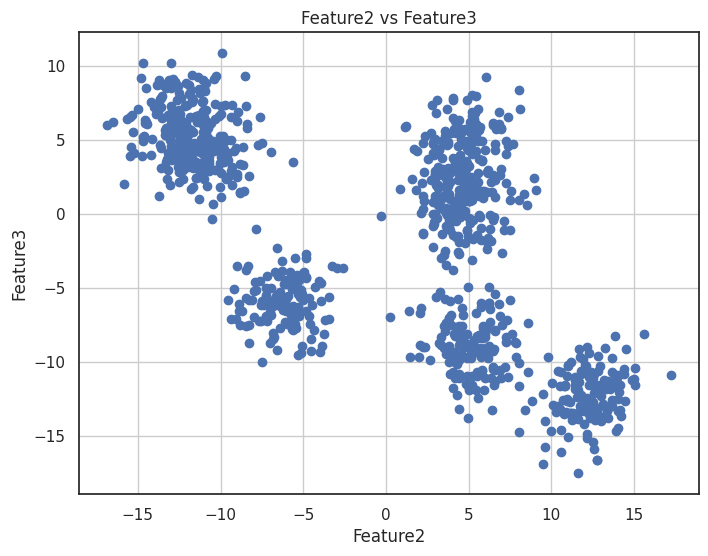

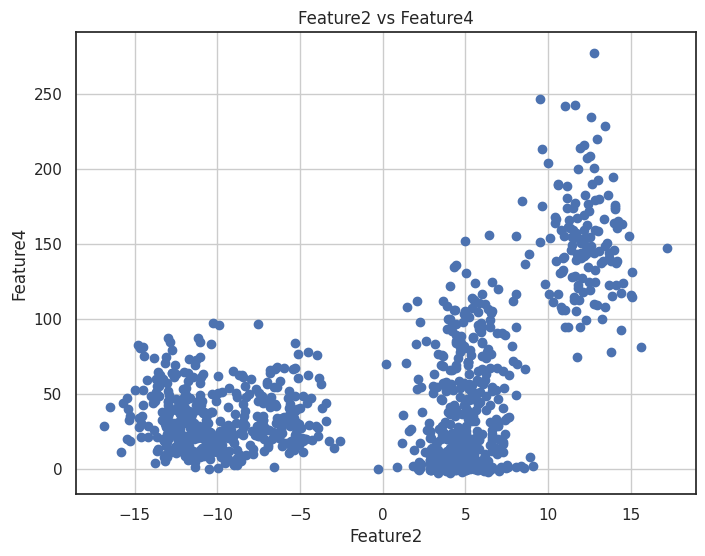

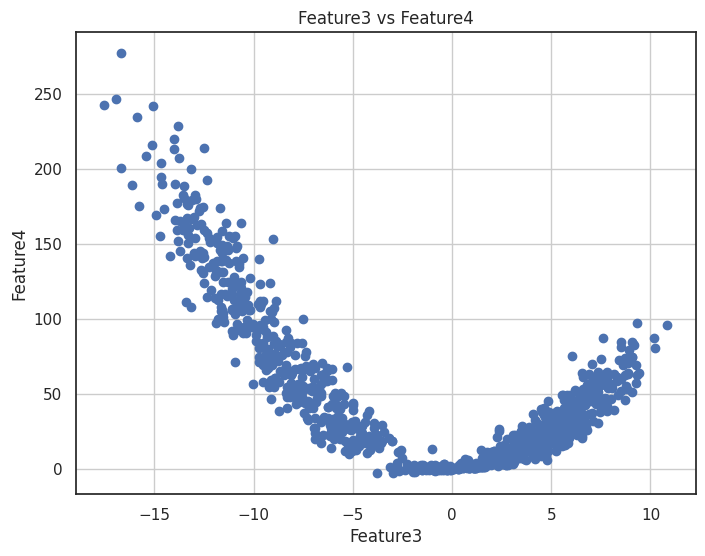

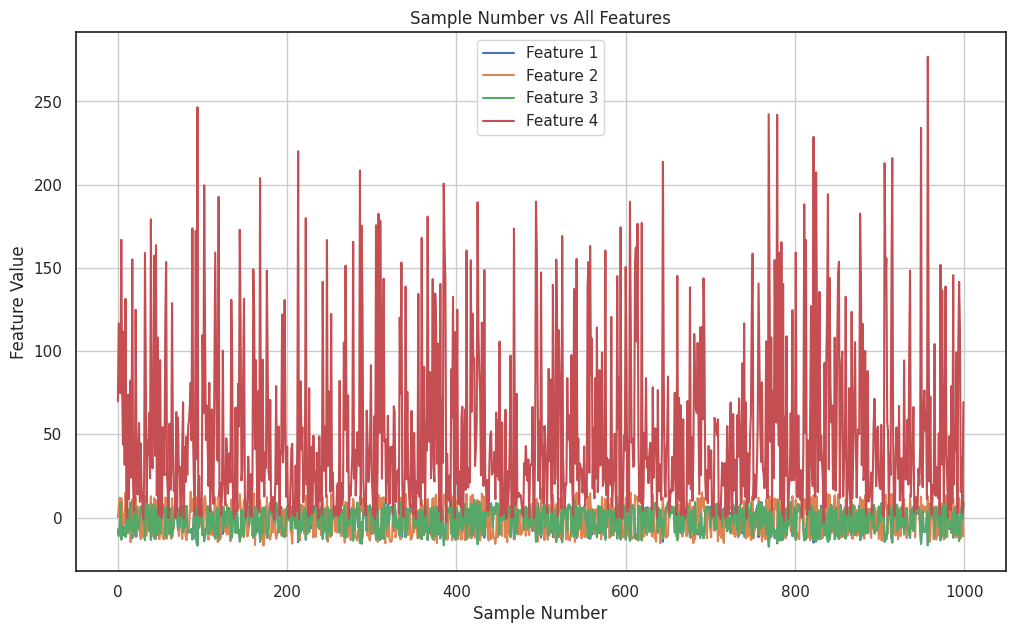

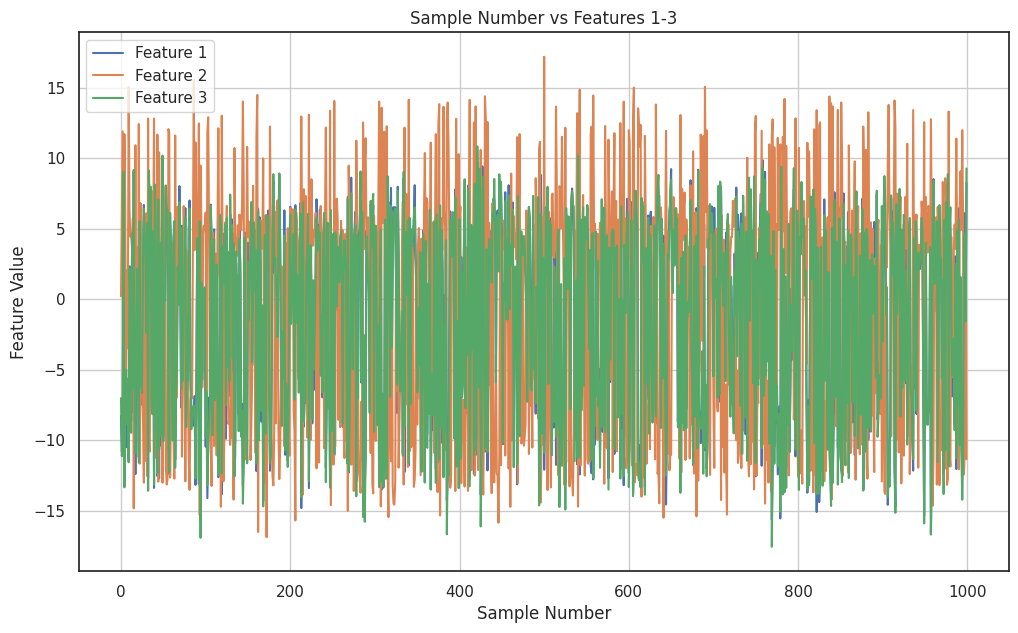

In [3]:
##first load the mystery data csv as a dataframe, then view the dataframe
df = pd.read_csv( "mysteryDataClustering.csv")
df

#next count and print the number of rows 
nrow_df = len(df)

print(nrow_df)

#since the first column is the sample number, the other 4 are the 4 different features. therefore there are 4 features and 1000 samples.


#lets now plot the features against each other to see if we can find any trends.


plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 1'], df['Feature 2'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Feature1 vs Feature2')
plt.grid(True)
plt.show()
#1 vs 2 shows some clustering which can indicate probable categories or groupings 

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 1'], df['Feature 3'])
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.title('Feature1 vs Feature3')
plt.grid(True)
plt.show()

#1 vs 3 shows a positive linear correlation between features 1 and 3, a feature 1 increases feature 3 increases

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 1'], df['Feature 4'])
plt.xlabel('Feature1')
plt.ylabel('Feature4')
plt.title('Feature1 vs Feature4')
plt.grid(True)
plt.show()
#1 vs 4 shows a nonlinear relationship with a negative exponential curve with a minimum of zero 

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 2'], df['Feature 3'])
plt.xlabel('Feature2')
plt.ylabel('Feature3')
plt.title('Feature2 vs Feature3')
plt.grid(True)
plt.show()
#2 vs 3 shows more clustering which again can indicate grouping or categories

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 2'], df['Feature 4'])
plt.xlabel('Feature2')
plt.ylabel('Feature4')
plt.title('Feature2 vs Feature4')
plt.grid(True)
plt.show()
#2 vs 4 shows some clustering however there are some outliers in the data

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 3'], df['Feature 4'])
plt.xlabel('Feature3')
plt.ylabel('Feature4')
plt.title('Feature3 vs Feature4')
plt.grid(True)
plt.show()
#3 vs 4 shows a nonlinear curve similar to 1 vs 4 however with a more spread across the datapoints

#we can now see if the sample number has an influence on the data by graphing the sample number vs the 4 different features

x_dat=df.iloc[:,0]

feat1 = df['Feature 1']
feat2 = df['Feature 2']
feat3 = df['Feature 3']
feat4 = df['Feature 4']


plt.figure(figsize=(12, 7)) 

plt.plot(x_dat.to_numpy(), feat1.to_numpy(), label='Feature 1')
plt.plot(x_dat.to_numpy(), feat2.to_numpy(), label='Feature 2')
plt.plot(x_dat.to_numpy(), feat3.to_numpy(), label='Feature 3')
plt.plot(x_dat.to_numpy(), feat4.to_numpy(), label='Feature 4')

plt.xlabel('Sample Number')
plt.ylabel('Feature Value')
plt.title('Sample Number vs All Features')
plt.grid(True)
plt.legend() 
plt.show()

#it looks like feature 4 is an outlier with a significantly different pattern than the other 3 but feature 2 is not shown, let's repeat the plot without feature 4

plt.figure(figsize=(12, 7)) 

plt.plot(x_dat.to_numpy(), feat1.to_numpy(), label='Feature 1')
plt.plot(x_dat.to_numpy(), feat2.to_numpy(), label='Feature 2')
plt.plot(x_dat.to_numpy(), feat3.to_numpy(), label='Feature 3')

plt.xlabel('Sample Number')
plt.ylabel('Feature Value')
plt.title('Sample Number vs Features 1-3')
plt.grid(True)
plt.legend() 
plt.show()

#we can now say that feature 4 has a significantly different pattern in data vs features 1-3 when comparing the sample number to feature values. 
#the next step would be to analyze 

## 2. Data pre-processing [6 marks]

Select two non-redundant features.

2.1. Which features are correlated?
Calculate the pairwise correlation between features.  You may also consider plotting the correlation.


2.2. Visualize the data distribution in 2d.  Plot the distribution of each feature with respect to the others. Hint: seaborn pair plot.

2.3. Identify two non-redundant features.

Redundant features are features that are strongly correlated to each other. Try to avoid features that are strongly correlated to each other. If two features are highly correlated to each other only use one from the pair.

Explain the reasoning behind your choice.


Subset the data using your selected two non-redundant features.  In the following, work with this subset.

Next, you will need to cluster the data and determine the correct number of clusters.



In [ ]:
#based on the previous graph we can do some more comparison between features using statistics
#we can use pairwise correlation features 

#we can use a for loop to loop through each feature and calculate the pairwise correlation

#we will have to use itertools combinations to have combinations with 4 features, for example features 1 vs 4, 1 vs 3, 1 vs 2, etc

from itertools import combinations

# next identify the names of your four features
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']

#now we will create a list of combinations of the list
feature_pairs = list(combinations(feature_names, 2))

correlations={}
for feature1, feature2 in feature_pairs:
    if feature1 in df.columns and feature2 in df.columns:
        correlation_value = df[feature1].corr(df[feature2])
        correlations[(feature1, feature2)] = correlation_value
    else:
        print(f"Warning: One or both features '{feature1}', '{feature2}' not found in the DataFrame.")

print("\nAll pairwise correlations:")
for pair, corr in correlations.items():
    print(f"{pair}: {corr:.4f}")


#we can see from the results:
# features
#1 vs 2 is a moderate negative correlation
#1 vs 3 is a strong positive correlation, which is congruent with the feature1 vs feature 3 graph plotted previously
#1 vs 4 is a strong negative correlation, which is somewhat similar to the feature 1 vs feature 4 graph previously, however after when the features both reach zero
#the feature values start to increase
#2 vs 3 has a moderate negative correlation
#2 vs 4 has a moderate positive correlation
#3 vs 4 has a strong negative correlation, which is somewhat similar to the feature3 vs 4 graph plotted previously with data points being more spread compared to 1 vs 4
#and similarily to 1 vs 4s pattern of increasing feature value after both features are equal to 0.


#now lets plot the distribution of each using the seaborn pair plot

sns.pairplot(df)

#observing the data in the pairplot, we can use this in conjunction with the results from the pairwise correlations to separate redundant from non redundant features
#Feature 4 has a negative exponential curve distribution in the bottom left of the graph while other features have a relatively random distribution
#Comparing feature 4 vs other features does not really result in a clear linear trend
#We can look at the other features in comparison and see that Feature 2 does not have a clear trend as well 

#From these observations we can state that feature 2 and feature 4 are nonredundant features since they do not have clear linear trends in the pairplot as well as low pairwise correlation
#Features 1 and 2 and 2 and 3 have a more clear clustering however with 4-5 identifiable clusters that are non redundant as well with a pairwise correlation of -0.61
#The pattern between 1 and 3 is linear and they have a high correlation (0.99), however 1 and 4 has a nonlinear pattern with a high correlation but slightly lower than 1 and 3 (-0.7)
#for now since 1 and 3 have the highest correlation we will use those as redundant features
#Even though 2 and 4 have a lower pairwise correlation, in terms of clustering 1 and 2 and or 2 and 3 would be better since they have clearer clusters than 2 and 4. 
#lets subset the data 


non_redun_data = df[['Feature 2', 'Feature 3']]



All pairwise correlations:
('Feature 1', 'Feature 2'): -0.6146
('Feature 1', 'Feature 3'): 0.9900
('Feature 1', 'Feature 4'): -0.7040
('Feature 2', 'Feature 3'): -0.6111
('Feature 2', 'Feature 4'): 0.4865
('Feature 3', 'Feature 4'): -0.6955


## 3.	Clustering [7 marks]

3.1. Before clustering, scatterplot the data using the two selected features.

3.2. Pass the data through at least two cluster determination algorithms.
(eg https://scikit-learn.org/stable/modules/clustering.htmlLinks to an external site.)

3.3. Generate at least three fitness statistics across several values of K, the number of clusters. Hint : e.g. distortion, silhouette.


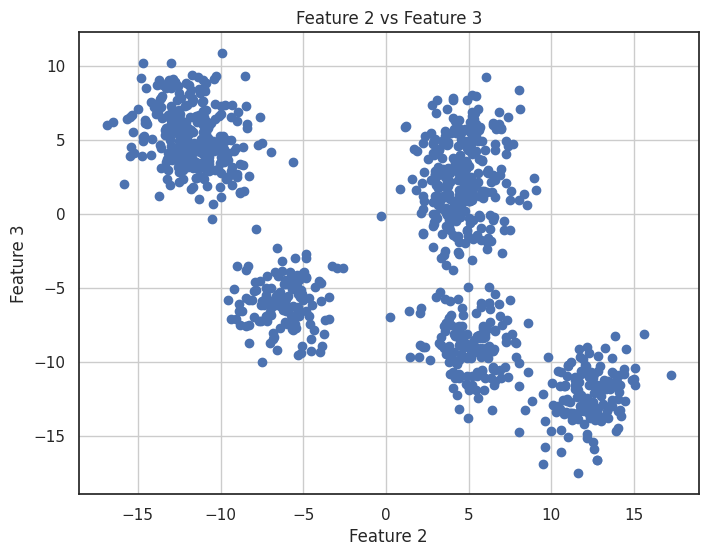

In [5]:
#Next we can use a scatterplot to map the two non-redundant selected features.

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 2'], df['Feature 3'])
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.title('Feature 2 vs Feature 3')
plt.grid(True)
plt.show()







In [17]:
#Now lets start with a kmeans clustering algorithm.

X = df[['Feature 2','Feature 3']]

#start with 5 clusters which was based on the observations of the scatterplot
kmeans = KMeans(n_clusters=5, init='random').fit(X)

kmeans_centroids            = kmeans.cluster_centers_ #saving the cdentroids
kmeans_labels_k3            = kmeans.labels_ #saving the labels
kmeans_labels_cluster_score = kmeans.inertia_ # determines the how well the data was clustered
df_centroids = pd.DataFrame(kmeans_centroids,columns=['x1','x2']) #store the centroids




,x1,x2
0,-11.751163,5.320235
1,12.194801,-12.291908
2,4.631085,2.572298
3,-6.225089,-5.928507
4,5.115262,-8.804240


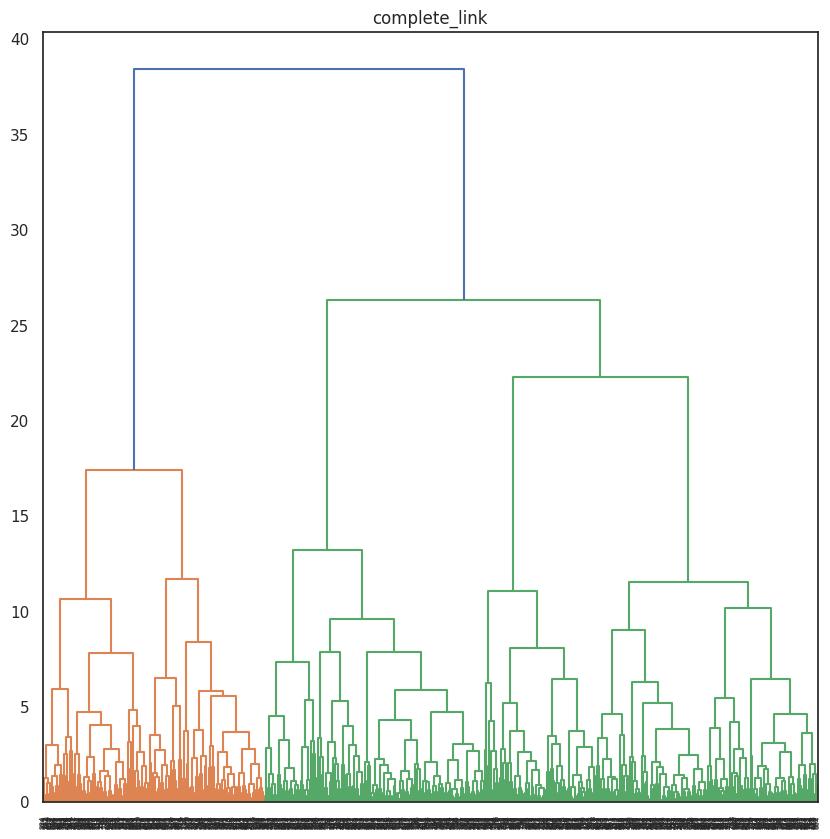

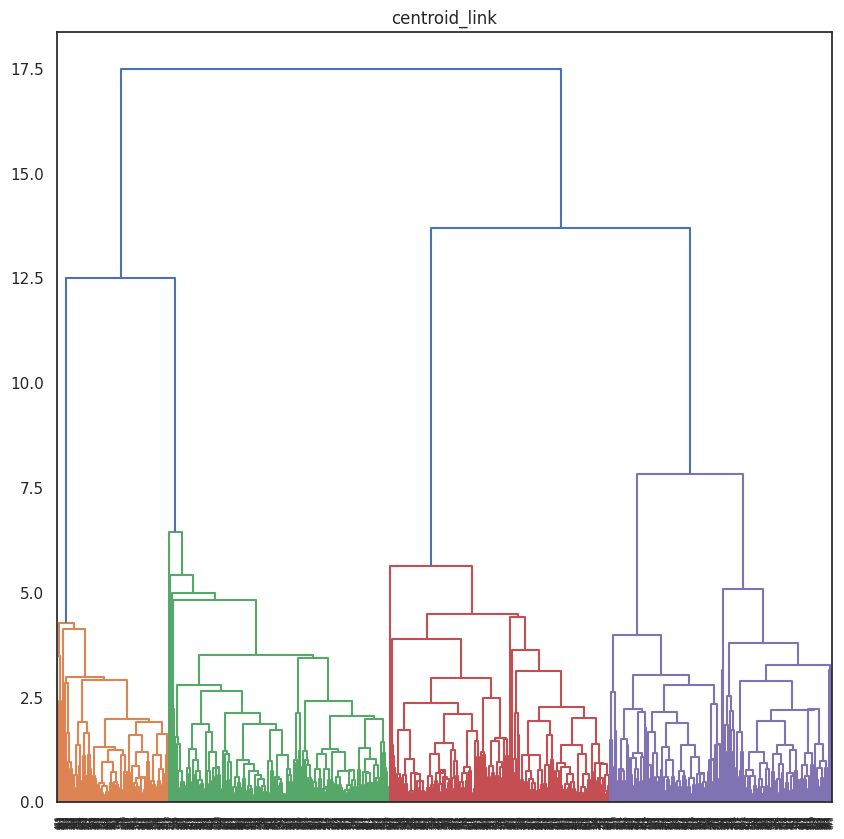

In [79]:
#The next clustering algorithm we can use is hierarchical clustering through sklearn.

from sklearn.cluster import AgglomerativeClustering

#also we will use a dendogram to look at clustering as well

from scipy.cluster.hierarchy import dendrogram, linkage

#create df for hier clust
df_hier = df[['Feature 2', 'Feature 3']]

X=df_hier

#initiate hier clustering
hclustering = AgglomerativeClustering(linkage='single',n_clusters=5).fit(X)
hclustering_labels_k3  = hclustering.labels_

#initiate dendogram creation by using the linkage function
#let's try different linkage methods to see how the results pan out
linked_single = linkage(df_hier[['Feature 2','Feature 3']], method='single')

linked_complete =linkage(df_hier[['Feature 2','Feature 3']], method='complete')

linked_average = linkage(df_hier[['Feature 2','Feature 3']], method='average')

linked_ward = linkage(df_hier[['Feature 2','Feature 3']], method='ward')

linked_centroid = linkage(df_hier[['Feature 2','Feature 3']], method='centroid')
#plot dendograms

#the rest of the code was included but commented out for reference
"""
plt.figure(figsize = (10, 10))
dendrogram(linked_single,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.title('single_link')
plt.show()
"""

plt.figure(figsize = (10, 10))
dendrogram(linked_complete,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.title('complete_link')
plt.show()

"""
plt.figure(figsize = (10, 10))
dendrogram(linked_average,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.title('average_link')
plt.show()

plt.figure(figsize = (10, 10))
dendrogram(linked_ward,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.title('ward_link')
plt.show()
"""
plt.figure(figsize = (10, 10))
dendrogram(linked_centroid,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.title('centroid_link')
plt.show()

In [87]:
#from the dendograms above it looks like the linkage method closely representing 5 clusters is the complete linkage method
#the centroid linkage was close to 5 clusters, however if we draw a horizontal line right above y=5 the horizontal line will intersect
#the blue merging cluster lines instead of the sample cluster colored branches which is incorrect

#the complete linkage suggested 5 clusters having a horizontal line at y=15 intersecting 5 sample cluster branches 

#lets try 5 clusters in the agglomerative clustering using the complete linkage now using the information above
X=df_hier

hclustering = AgglomerativeClustering(linkage='complete',n_clusters=5).fit(X)
hclustering_labels_k3  = hclustering.labels_




## 4. Visualize the fitness statistics for both clustering runs across K values [4 marks]

4.1. Visualize the fitness statistics for both clustering runs across K values.



In [51]:
#create a results list to store values 
results    = {
    'centroids':{},
    'distortion_score':{},
    'silhouette_score':{},
    'calinski_harabasz_score':{},
    'davies_bouldin_score':{},
    }
#define range of min and max clusters
min_clust_num = 2
max_clust_num = 20

#create the for loop of min cluster to max cluster
for k in range(min_clust_num,max_clust_num+1):
    kmeans = KMeans(n_clusters=k, init='random').fit(X) 
    
    #now let's save the necessary data 
    df['cluster_k{}'.format(k)]           = kmeans.labels_
    results['centroids'][k]               = kmeans.cluster_centers_
    results['distortion_score'][k]        = kmeans.inertia_ 
    results['silhouette_score'][k]        = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    results['calinski_harabasz_score'][k] = metrics.calinski_harabasz_score(X, kmeans.labels_)
    results['davies_bouldin_score'][k]    = metrics.davies_bouldin_score(X, kmeans.labels_)



# create an empty df to store the kmeans scores
df_kmeans_scores = pd.DataFrame()

#set each score result as a column to be stored in the newly created empty df above

df_kmeans_scores['Distortion Score']  = pd.Series(results['distortion_score'])

df_kmeans_scores['Silhouette Score']  = pd.Series(results['silhouette_score'])

df_kmeans_scores['Calinski Harabasz Score']  = pd.Series(results['calinski_harabasz_score'])

df_kmeans_scores['Davies Bouldin Score']  = pd.Series(results['davies_bouldin_score'])

df_kmeans_scores.index.name='k'

#display the kmeans scores
df_kmeans_scores


,Distortion Score,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
k,,,,
2,53248.248590,0.531651,1406.508263,0.750841
3,26468.837569,0.590063,1917.611070,0.566635
4,11439.976268,0.680747,3391.055939,0.444562
5,7078.960642,0.675621,4259.211445,0.439763
6,5646.255177,0.614375,4318.120842,0.569034
7,4716.986963,0.514252,4335.685419,0.719916
8,4380.887181,0.468869,4008.395737,0.836017
9,4049.731429,0.446500,3800.260963,0.887943
10,3875.350994,0.393392,3532.190150,0.999849


In [80]:
#store hierarch results
results_hier    = {
    'silhouette_score':{},
    'calinski_harabasz_score':{},
    'davies_bouldin_score':{},
    }

#cluster range
min_clust_num = 2
max_clust_num = 20

#create for loop for the clusters in hierch clusterring

for k in range(min_clust_num,max_clust_num+1):
    hclustering = AgglomerativeClustering(linkage='complete',n_clusters=k).fit(X)
    df['hier_cluster_k{}'.format(k)]           = hclustering.labels_

    results_hier['silhouette_score'][k]        = metrics.silhouette_score(X, hclustering.labels_, metric='euclidean')
    results_hier['calinski_harabasz_score'][k] = metrics.calinski_harabasz_score(X, hclustering.labels_)
    results_hier['davies_bouldin_score'][k]    = metrics.davies_bouldin_score(X, hclustering.labels_)


# create an empty df to store hierch clust scores
df_hier_scores = pd.DataFrame()

#set columns for each score
df_hier_scores['Silhouette Score']  = pd.Series(results_hier['silhouette_score'])
df_hier_scores['Calinski Harabasz Score']  = pd.Series(results_hier['calinski_harabasz_score'])
df_hier_scores['Davies Bouldin Score']  = pd.Series(results_hier['davies_bouldin_score'])

#set index
df_hier_scores.index.name='k'
df_hier_scores


,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
k,,,
2,0.463865,1043.024371,0.729724
3,0.590063,1917.611070,0.566635
4,0.679687,3368.586444,0.445345
5,0.673854,4189.272738,0.441996
6,0.588034,3979.791095,0.582745
7,0.543622,3550.519632,0.698361
8,0.411618,3387.888571,0.924937
9,0.342518,3047.303010,1.044714
10,0.305398,2843.159953,1.107608


## 5.	Visualize the cluster assignment [3 marks]

5.1. For both clustering algorithms of your choice, plot the data in 2D.
Colour each sample based on their cluster assignment in the 2D plot.
Mark the centroids if appropriate.


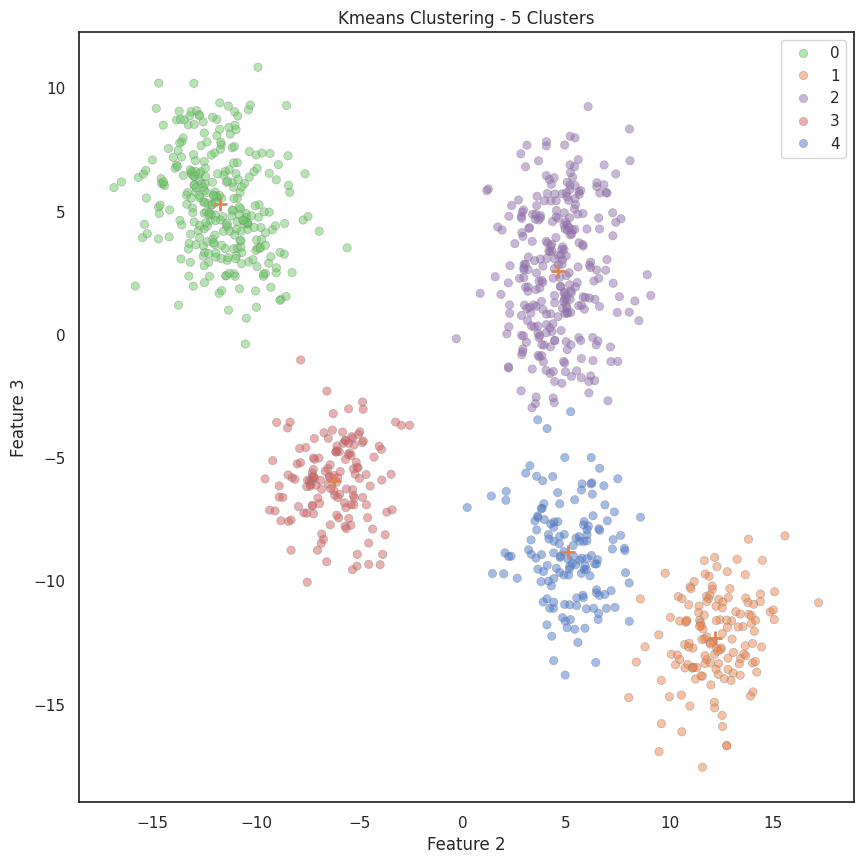

In [85]:

df['labels_k3'] = kmeans_labels_k3 # create a new column for labels
colorPalette='muted' #select muted palette
#bind palette to each clusters unique label 
colors = dict(zip(df['labels_k3'].unique(),sns.color_palette(colorPalette))) 

plt.figure(figsize = (10, 10))
plt.title('Kmeans Clustering - 5 Clusters')

#plot data points
ax = sns.scatterplot(x='Feature 2', y='Feature 3',hue='labels_k3',palette=colors,data=df,edgecolor='grey',alpha=0.5)
#then plot the centroids from the df_centroids to overlay
ax = sns.scatterplot(x='x1', y='x2',data=df_centroids,linewidth=2.0,marker='+',s=100)

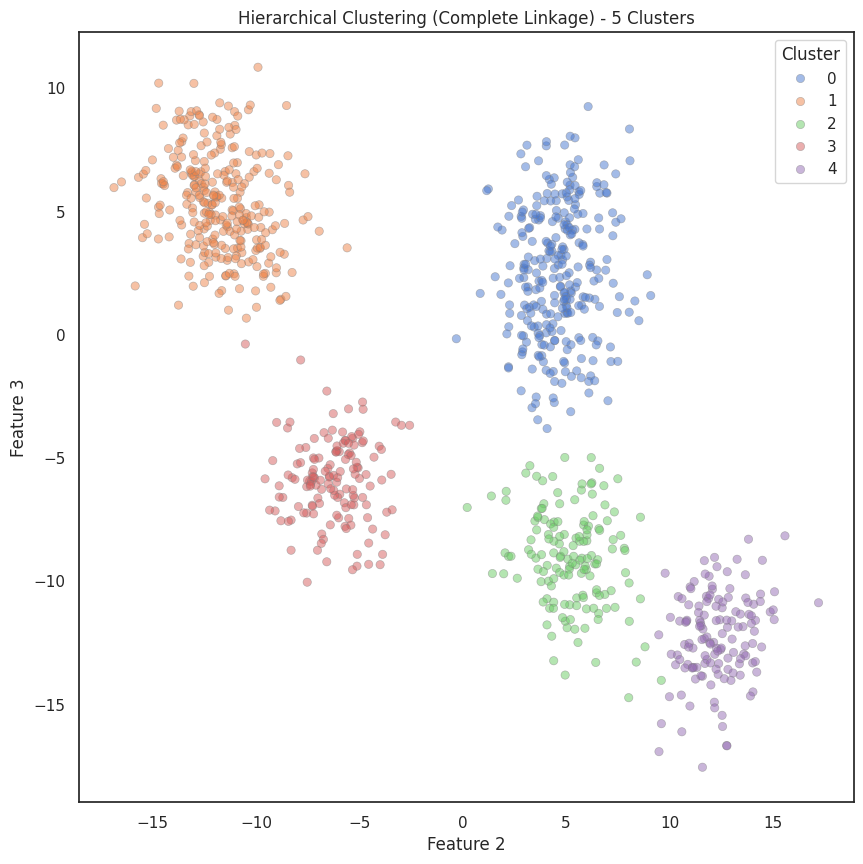

In [88]:
#create column for cluster labels
df['labels_k3'] = hclustering_labels_k3

#plot figure using the labels from agglomerative clustering 
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x='Feature 2', y='Feature 3', hue='labels_k3', palette='muted', data=df, edgecolor='grey', alpha=0.5)
plt.title('Hierarchical Clustering (Complete Linkage) - 5 Clusters')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.legend(title='Cluster', loc='upper right')
plt.show()


## 6. Identify the number of clusters [7 marks]

6.1. How many clusters would you predict?

6.2. Explain your reasoning.  Refer to/provide relevant plots to support your answer.


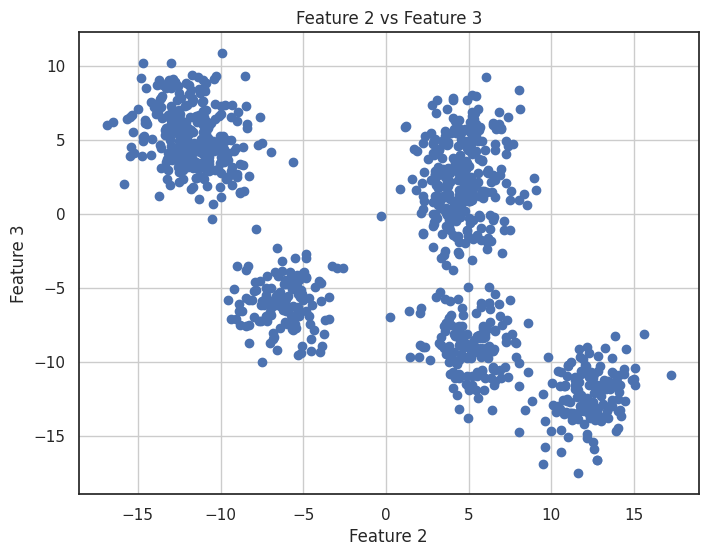

In [90]:
#From the data given above, I would predict a total of 5 clusters between Features 2 and 3

#It is evident that there are 5 different clusters:

#from the first scatter plot for feature 2 vs 3 we can visually observe that there are 4-5 clusters

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 2'], df['Feature 3'])
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.title('Feature 2 vs Feature 3')
plt.grid(True)
plt.show()

In [97]:
#Next when looking at the kmeans and hierarchical agglomerative clustering scoring we have similarities to suggest 5 clusters.

#first in both the kmeans and hier clustering k=5 had the highest silhouette score, calinski harabasz score, and lowest davies bouldin score
#a high silouette score means the object or data points are matched most closely to their own perspective clusters
#a high calinski harabasz score states that clustering it better with clusters clearly separated and dense data within their own clusters
#a lower davies bouldin score means that the clusters are more compact to the centroid

k5_kmeans=df_kmeans_scores.iloc[3]

k5_hier=df_hier_scores.iloc[3]


print(k5_kmeans)
print(k5_hier)

Distortion Score           7078.960642
Silhouette Score              0.675621
Calinski Harabasz Score    4259.211445
Davies Bouldin Score          0.439763
Name: 5, dtype: float64
Silhouette Score              0.673854
Calinski Harabasz Score    4189.272738
Davies Bouldin Score          0.441996
Name: 5, dtype: float64


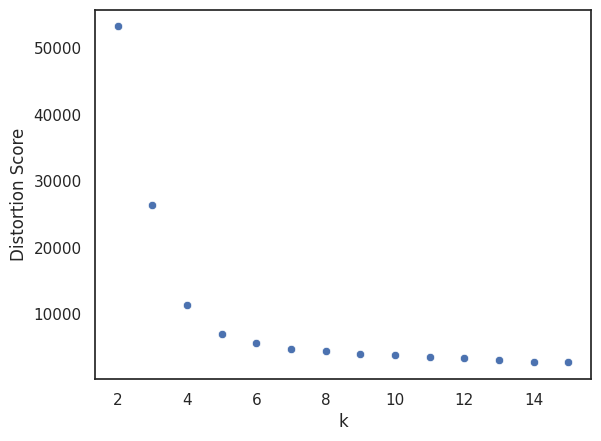

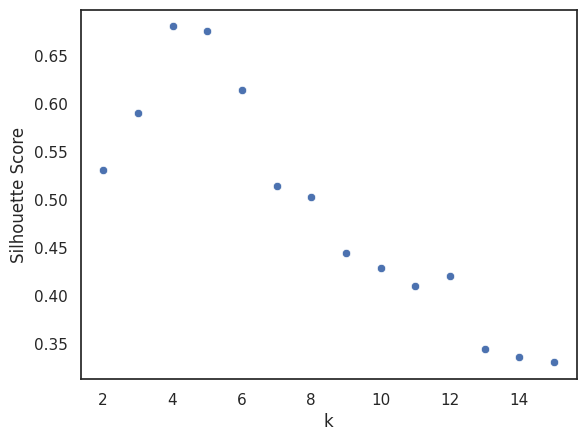

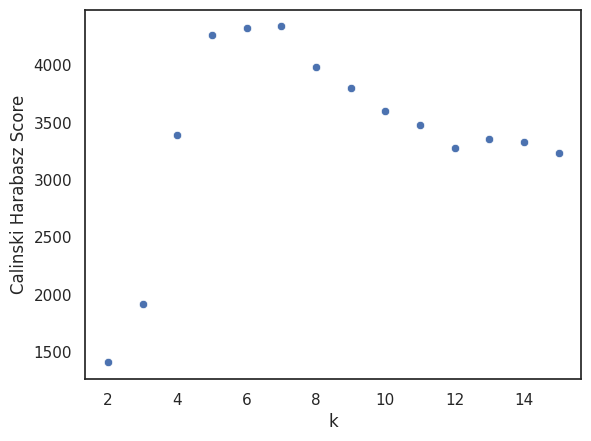

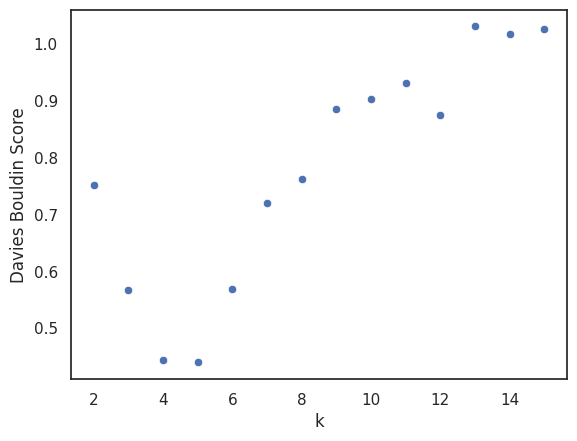

In [98]:
#do a for loop for the kmeans scores 
for yNam in df_kmeans_scores.columns:
    ax = sns.scatterplot(x='k', y=yNam,data=df_scores)
    plt.show()
    
#now we can see k=5 is at the elbow point in the distortion score
#this point k=5 also has the highest silhouette and calinski scores with a corresponding lowest davies bouldin score.

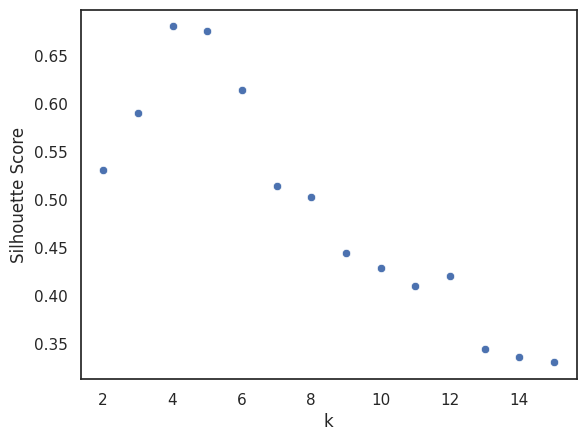

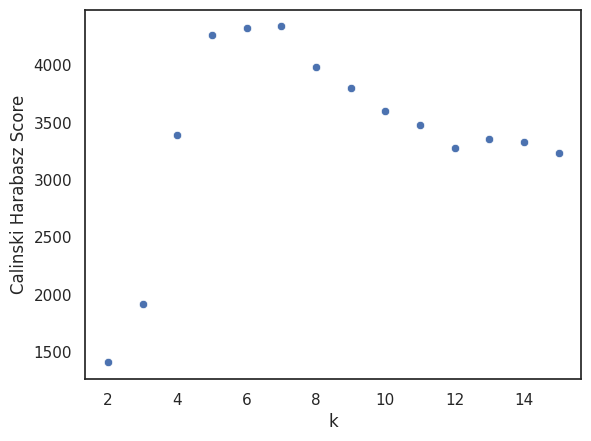

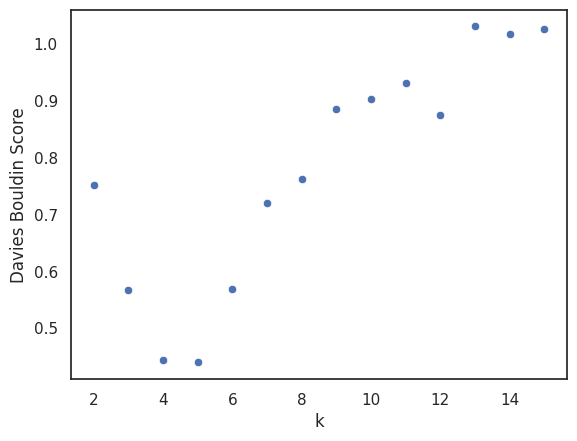

In [99]:
#do a for loop for the hier clustering algorithm scores
for yNam in df_hier_scores.columns:
    ax = sns.scatterplot(x='k', y=yNam,data=df_scores)
    plt.show()
    
#the point k=5 has the highest silhouette and calinski scores with a corresponding lowest davies bouldin score similarly to the kmeans clustering algorithm results.
